In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
lapts = pd.read_csv('laptops.csv')

In [3]:
lapts.shape

(2160, 12)

In [4]:
lapts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laptop        2160 non-null   object 
 1   Status        2160 non-null   object 
 2   Brand         2160 non-null   object 
 3   Model         2160 non-null   object 
 4   CPU           2160 non-null   object 
 5   RAM           2160 non-null   int64  
 6   Storage       2160 non-null   int64  
 7   Storage type  2118 non-null   object 
 8   GPU           789 non-null    object 
 9   Screen        2156 non-null   float64
 10  Touch         2160 non-null   object 
 11  Final Price   2160 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 202.6+ KB


In [5]:
lapts.columns = lapts.columns.str.lower().str.replace(' ', '_')

In [6]:
lapts.columns

Index(['laptop', 'status', 'brand', 'model', 'cpu', 'ram', 'storage',
       'storage_type', 'gpu', 'screen', 'touch', 'final_price'],
      dtype='object')

In [7]:
work_columns = ['ram', 'storage', 'screen', 'final_price']
df = lapts[work_columns]
df.head()

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ram          2160 non-null   int64  
 1   storage      2160 non-null   int64  
 2   screen       2156 non-null   float64
 3   final_price  2160 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 67.6 KB


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


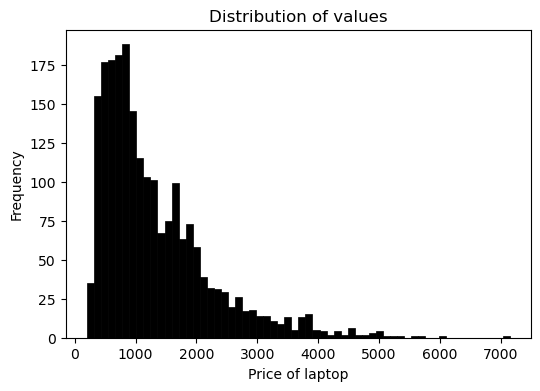

In [9]:
plt.figure(figsize=(6, 4))

sns.histplot(df.final_price, bins=60, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price of laptop')
plt.title('Distribution of values')

plt.show()

# Q 1

In [10]:
df.isna().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

# Q 2

In [11]:
df['ram'].median()

16.0

In [12]:
np.random.seed(42)

l = len(df)

len_train = int(0.6 * l)
len_val = int(0.2 * l)
len_test = l - len_train - len_val

idx = np.arange(l)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:len_train].copy()
df_val = df_shuffled.iloc[len_train:len_train + len_val].copy()
df_test = df_shuffled.iloc[len_train + len_val:].copy()

y_train_orig = df_train['final_price'].values
y_val_orig = df_val['final_price'].values
y_test_orig = df_test['final_price'].values

y_train = np.log1p(y_train_orig)
y_val = np.log1p(y_val_orig)
y_test = np.log1p(y_test_orig)

del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

# Q 3

In [13]:
# filling missings function
def fill_missing(df_train, df_val, df_test, value):
    df_train_new = df_train.fillna(value).values
    df_val_new = df_val.fillna(value).values
    df_test_new = df_test.fillna(value).values
    return df_train_new, df_val_new, df_test_new

In [14]:
# function for calculating weights of linear regression
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [15]:
# getting predictions
def get_prediction(w0_0, w_0, df):
    return w0_0 + df.dot(w_0)

In [16]:
# function for RMSE
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return round(np.sqrt(mse), 2)

In [17]:
df_train_new, df_val_new, df_test_new = fill_missing(df_train, df_val, df_test, 0)
w0_0, w_0 = train_linear_regression(df_train_new, y_train)
y_pred = get_prediction(w0_0, w_0, df_val_new)
rmse(y_val, y_pred)

0.43

In [19]:
fp_med_train = np.median(y_train)
df_train_med, df_val_med, df_test_med = fill_missing(df_train, df_val, df_test, fp_med_train)
w0_0, w_0 = train_linear_regression(df_train_new, y_train)
y_pred = get_prediction(w0_0, w_0, df_val_new)
rmse(y_val, y_pred)

0.43

# Q 4

In [20]:
# function for linear regression with regularization
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [26]:
r_list = [0, 0.01, 0.1, 1, 5, 10, 100]

In [27]:
def answer_question4(X, y, X_val, y_val, r_list):
    min_rmse = 10**10
    min_r = 10**10
    for r in r_list:
        w_0, w = train_linear_regression_reg(X, y, r)
        y_val_pred = w_0 + X_val.dot(w)
        rmse_r = round(rmse(y_val, y_val_pred), 2)
        if rmse_r < min_rmse:
            min_rmse = rmse_r
            min_r = [r]
            w0_best = w_0
            w_best = w
    return min_rmse, min_r, w0_best, w_best

In [28]:
best_rmse, min_r, w_0, w = answer_question4(df_train_new, y_train, df_val_new, y_val, r_list)

In [29]:
min_r

[0]

In [31]:
def answer_question4_2(X_val, y_val, r_list):
    min_rmse = 10**100
    min_r = 10**100
    for r in r_list:
        w_0, w = train_linear_regression_reg(X_val, y_val, r)
        y_val_pred = w_0 + X_val.dot(w)
        rmse_r = round(rmse(y_val, y_val_pred), 2)
        print(r, ' - ', rmse_r)
        if rmse_r < min_rmse:
            min_rmse = rmse_r
            min_r = [r]
            w0_best = w_0
            w_best = w
        if rmse_r == min_rmse:
            min_r.append(r)
    return min_rmse, min(min_r), w0_best, w_best

In [33]:
best_rmse, min_r, w_0, w = answer_question4_2(df_val_new, y_val, r_list)
min_r

0  -  0.42
0.01  -  0.42
0.1  -  0.42
1  -  0.44
5  -  0.54
10  -  0.6
100  -  0.7


0

# Q 5

In [41]:
def question5_answer(df, seed_list):
    val_scores = []
    for seed in seed_list:
        np.random.seed(seed)

        l = len(df)

        len_train = int(0.6 * l)
        len_val = int(0.2 * l)
        len_test = l - len_train - len_val

        idx = np.arange(l)
        np.random.shuffle(idx)

        df_shuffled = df.iloc[idx]

        df_train = df_shuffled.iloc[:len_train].copy()
        df_val = df_shuffled.iloc[len_train:len_train + len_val].copy()
        df_test = df_shuffled.iloc[len_train + len_val:].copy()

        y_train_orig = df_train['final_price'].values
        y_val_orig = df_val['final_price'].values
        y_test_orig = df_test['final_price'].values

        y_train = y_train_orig
        y_val = y_val_orig
        y_test = y_test_orig

        del df_train['final_price']
        del df_val['final_price']
        del df_test['final_price']

        X_train = df_train.fillna(0).values
        X_val = df_val.fillna(0).values
        X_test = df_test.fillna(0).values

        w_0, w = train_linear_regression(X_train, y_train)
        y_pred = w_0 + X_val.dot(w)
        val_scores.append(rmse(y_val, y_pred))
    return val_scores

In [42]:
seed_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [43]:
val_scores = question5_answer(df, seed_list)
val_scores

[565.45, 636.8, 588.96, 597.81, 571.96, 573.24, 647.34, 550.44, 587.33, 576.1]

In [44]:
print(round(np.std(val_scores), 3))

29.176


# Q 6

In [45]:
def question6_answer(df, seed, r):
    np.random.seed(seed)

    l = len(df)

    len_train = int(0.6 * l)
    len_val = int(0.2 * l)
    len_test = l - len_train - len_val

    idx = np.arange(l)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:len_train].copy()
    df_val = df_shuffled.iloc[len_train:len_train + len_val].copy()
    df_test = df_shuffled.iloc[len_train + len_val:].copy()

    df_train = pd.concat([df_train, df_val], ignore_index=True)

    y_train = df_train['final_price'].values
    y_test = df_test['final_price'].values

    del df_train['final_price']
    del df_test['final_price']

    X_train = df_train.fillna(0).values
    X_test = df_test.fillna(0).values

    w_0, w = train_linear_regression_reg(X_train, y_train, r)
    y_pred = w_0 + X_test.dot(w)
    return rmse(y_test, y_pred)

In [46]:
answer = question6_answer(df, 9, 0.001)

In [47]:
answer, round(answer, 2)

(608.61, 608.61)